In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [84]:


# Read the JSON file into a pandas DataFrame
file_path = './data/USD_Manufacturing_PMI.json'  
ManufacturingPMI = pd.read_json(file_path);

file_path = './data/USD_Unemployment_Rate.json' 
UnemploymentRate = pd.read_json(file_path);

file_path = './data/USD_Services_PMI.json'  
ServicesPMI = pd.read_json(file_path);

file_path = './data/USD - Industrial Production (MoM).json' 
IndustrialProduction = pd.read_json(file_path);

file_path = './data/USD - Average Hourly Earnings (MoM).json' 
AverageHourlyEarnings = pd.read_json(file_path);

file_path = './data/USD - Monthly Budget Statement.json' 
MonthlyBudget = pd.read_json(file_path);

file_path = './data/USD - OLTS Job Openings.json' 
OLTSJobOpenings = pd.read_json(file_path);

file_path = './data/USD - Producer Price Index ex Food & Energy (MoM).json' 
ProducerPriceIndex_FoodEnergyMoM = pd.read_json(file_path);

file_path = './data/USD - Producer Price Index ex Food & Energy (YoY).json' 
ProducerPriceIndex_FoodEnergyYoY = pd.read_json(file_path);

file_path = './data/USD - Retail Sales (MoM).json' 
RetailSales = pd.read_json(file_path);

file_path = './data/USD - Retail Sales Control Group.json' 
RetailSalesControlGroup = pd.read_json(file_path);

file_path = './data/USD - UoM 5-year Consumer Inflation Expectation.json' 
ConsumerInflationExpectation = pd.read_json(file_path);

file_path = './data/USD_ ISM_Manufacturing_Prices_Paid.json' 
ManufacturingPricesPaid = pd.read_json(file_path);

file_path = './data/USD_Composite_PMI.json' 
CompositePMI = pd.read_json(file_path);

file_path = './data/USD_Factory_Orders_MoM.json' 
FactoryOrders = pd.read_json(file_path);

file_path = './data/USD_Manufacturing_Employment_Index_ISM.json' 
ManufacturingEmploymentIndex = pd.read_json(file_path);

file_path = './data/USD_Manufacturing_New_Orders_Index_ISM.json' 
ManufacturingNewOrdersIndex = pd.read_json(file_path);

file_path = './data/USD_ISM_Manufacturing_PMI.json' 
ISMManufacturing = pd.read_json(file_path);



# print(UnemploymentRate)

final_df = pd.DataFrame();
final_df['unemployment'] = UnemploymentRate['periodDateUtc'];
final_df['unemployment'] = UnemploymentRate['actual'];
final_df['manufaturing'] = ManufacturingPMI['actual'];
final_df['services'] = ServicesPMI['actual'];
final_df['IndustrialProduction'] = IndustrialProduction['actual'];
final_df['AverageHourlyEarnings'] = AverageHourlyEarnings['actual'];
final_df['MonthlyBudget'] = MonthlyBudget['actual'];
final_df['OLTSJobOpenings'] = OLTSJobOpenings['actual'];
final_df['ProducerPriceIndex_FoodEnergyMoM'] = ProducerPriceIndex_FoodEnergyMoM['actual'];
final_df['ProducerPriceIndex_FoodEnergyYoY'] = ProducerPriceIndex_FoodEnergyYoY['actual'];
final_df['RetailSales'] = RetailSales['actual'];
final_df['RetailSalesControlGroup'] = RetailSalesControlGroup['actual'];
final_df['ConsumerInflationExpectation'] = ConsumerInflationExpectation['actual'];
final_df['ManufacturingPricesPaid'] = ManufacturingPricesPaid['actual'];
final_df['CompositePMI'] = CompositePMI['actual'];
final_df['FactoryOrders'] = FactoryOrders['actual'];
final_df['ManufacturingEmploymentIndex'] = ManufacturingEmploymentIndex['actual'];
final_df['ManufacturingNewOrdersIndex'] = ManufacturingNewOrdersIndex['actual'];
final_df['ISMManufacturing'] = ISMManufacturing['actual'];

# final_df.to_csv('./data/combined_data.csv', index=False)


final_df.head()

,unemployment,manufaturing,services,IndustrialProduction,AverageHourlyEarnings,MonthlyBudget,OLTSJobOpenings,ProducerPriceIndex_FoodEnergyMoM,ProducerPriceIndex_FoodEnergyYoY,RetailSales,RetailSalesControlGroup,ConsumerInflationExpectation,ManufacturingPricesPaid,CompositePMI,FactoryOrders,ManufacturingEmploymentIndex,ManufacturingNewOrdersIndex,ISMManufacturing
0,3.6,46.3,54.4,-0.5,0.4,-228.0,9.824,0.1,2.4,0.2,0.6,3.1,41.8,53.2,0.3,48.1,46.0,46.0
1,3.7,46.3,54.1,-0.2,0.3,-240.0,10.103,0.2,2.8,0.3,0.2,3.0,44.2,53.0,0.4,51.4,46.9,46.9
2,3.4,48.4,54.9,0.5,0.5,176.0,9.590,0.2,3.2,0.4,0.7,3.0,53.2,54.3,0.9,50.2,47.1,47.1
3,3.5,48.5,55.1,0.4,0.3,-378.0,9.931,-0.1,3.4,-1.0,-0.3,3.1,49.2,54.5,-0.7,46.9,46.3,46.3
4,3.6,50.2,53.6,0.0,0.2,-262.0,10.824,0.0,4.4,-0.4,0.5,3.2,51.3,53.4,-1.6,49.1,47.7,47.7


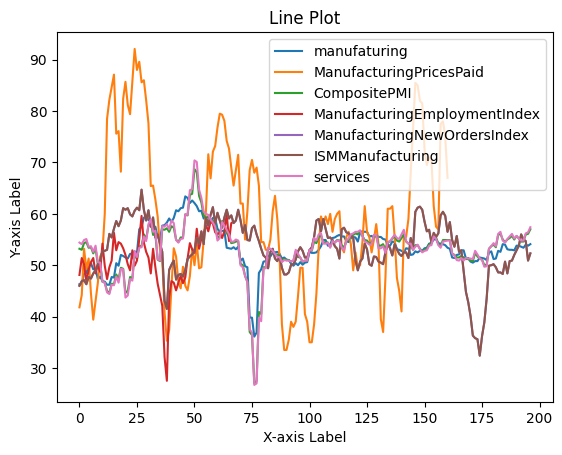

In [58]:


plt.plot(final_df.index, final_df['manufaturing'], label='manufaturing')
plt.plot(final_df.index, final_df['ManufacturingPricesPaid'], label='ManufacturingPricesPaid')
plt.plot(final_df.index, final_df['CompositePMI'], label='CompositePMI')
plt.plot(final_df.index, final_df['ManufacturingEmploymentIndex'], label='ManufacturingEmploymentIndex')
plt.plot(final_df.index, final_df['ManufacturingNewOrdersIndex'], label='ManufacturingNewOrdersIndex')
plt.plot(final_df.index, final_df['ISMManufacturing'], label='ISMManufacturing')
plt.plot(final_df.index, final_df['services'], label='services')

# plt.plot(final_df.index, final_df['unemployment'], label='unemployment')
# plt.plot(final_df.index, final_df['services'], label='services')
# plt.plot(final_df.index, final_df['IndustrialProduction'], label='IndustrialProduction')
# plt.plot(final_df.index, final_df['AverageHourlyEarnings'], label='AverageHourlyEarnings')
# # plt.plot(final_df.index, final_df['MonthlyBudget'], label='MonthlyBudget')
# plt.plot(final_df.index, final_df['OLTSJobOpenings'], label='OLTSJobOpenings')
# plt.plot(final_df.index, final_df['ProducerPriceIndex_FoodEnergyMoM'], label='ProducerPriceIndex_FoodEnergyMoM')
# plt.plot(final_df.index, final_df['ProducerPriceIndex_FoodEnergyYoY'], label='ProducerPriceIndex_FoodEnergyYoY')
# plt.plot(final_df.index, final_df['RetailSales'], label='RetailSales')
# plt.plot(final_df.index, final_df['RetailSalesControlGroup'], label='RetailSalesControlGroup')
# plt.plot(final_df.index, final_df['ConsumerInflationExpectation'], label='ConsumerInflationExpectation')
# plt.plot(final_df.index, final_df['FactoryOrders'], label='FactoryOrders')

plt.legend()

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Line Plot')
plt.show()

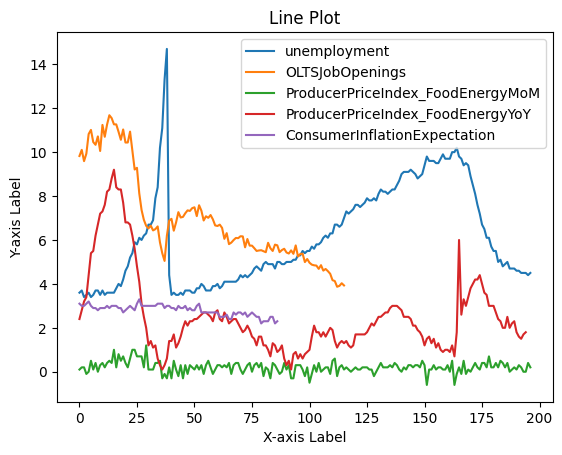

In [83]:
plt.plot(final_df.index, final_df['unemployment'], label='unemployment')
plt.plot(final_df.index, final_df['OLTSJobOpenings'], label='OLTSJobOpenings')
plt.plot(final_df.index, final_df['ProducerPriceIndex_FoodEnergyMoM'], label='ProducerPriceIndex_FoodEnergyMoM')
plt.plot(final_df.index, final_df['ProducerPriceIndex_FoodEnergyYoY'], label='ProducerPriceIndex_FoodEnergyYoY')
plt.plot(final_df.index, final_df['ConsumerInflationExpectation'], label='ConsumerInflationExpectation')

# plt.plot(final_df.index, final_df['RetailSales'], label='RetailSales')
# plt.plot(final_df.index, final_df['RetailSalesControlGroup'], label='RetailSalesControlGroup')
# plt.plot(final_df.index, final_df['IndustrialProduction'], label='IndustrialProduction')
# plt.plot(final_df.index, final_df['AverageHourlyEarnings'], label='AverageHourlyEarnings')
# plt.plot(final_df.index, final_df['FactoryOrders'], label='FactoryOrders')
# plt.plot(final_df.index, final_df['MonthlyBudget'], label='MonthlyBudget')

plt.legend()

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Line Plot')
plt.show()

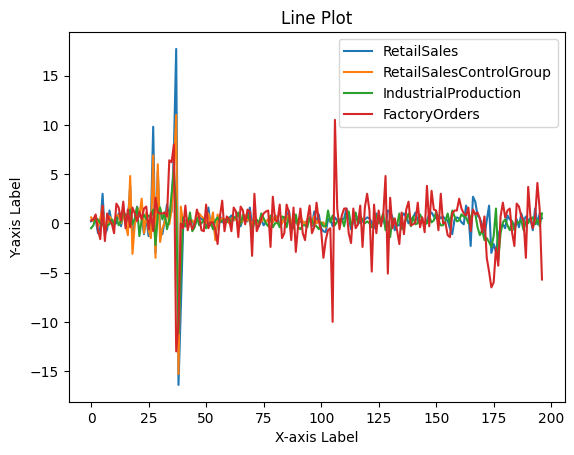

In [81]:
plt.plot(final_df.index, final_df['RetailSales'], label='RetailSales')
plt.plot(final_df.index, final_df['RetailSalesControlGroup'], label='RetailSalesControlGroup')
plt.plot(final_df.index, final_df['IndustrialProduction'], label='IndustrialProduction')
plt.plot(final_df.index, final_df['FactoryOrders'], label='FactoryOrders')


# plt.plot(final_df.index, final_df['AverageHourlyEarnings'], label='AverageHourlyEarnings')
# plt.plot(final_df.index, final_df['MonthlyBudget'], label='MonthlyBudget')
plt.legend()

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Line Plot')
plt.show()

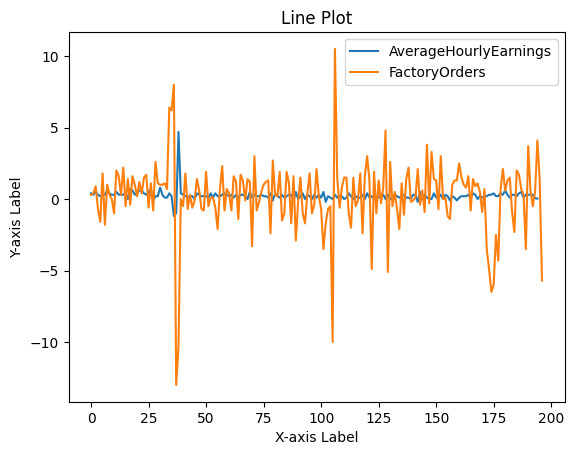

In [80]:
plt.plot(final_df.index, final_df['AverageHourlyEarnings'], label='AverageHourlyEarnings')
# plt.plot(final_df.index, final_df['MonthlyBudget'], label='MonthlyBudget')
plt.legend()

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Line Plot')
plt.show()

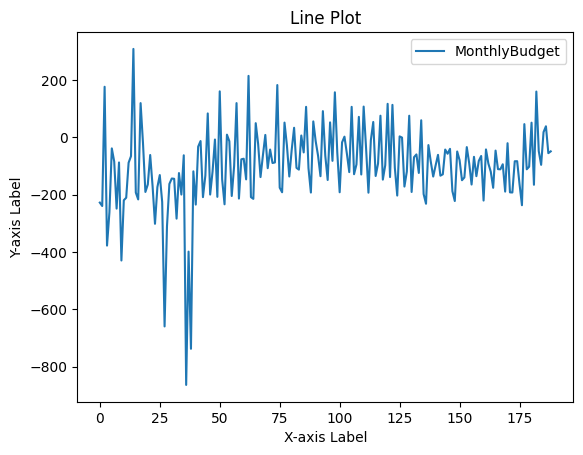

In [77]:
plt.plot(final_df.index, final_df['MonthlyBudget'], label='MonthlyBudget')
plt.legend()

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Line Plot')
plt.show()

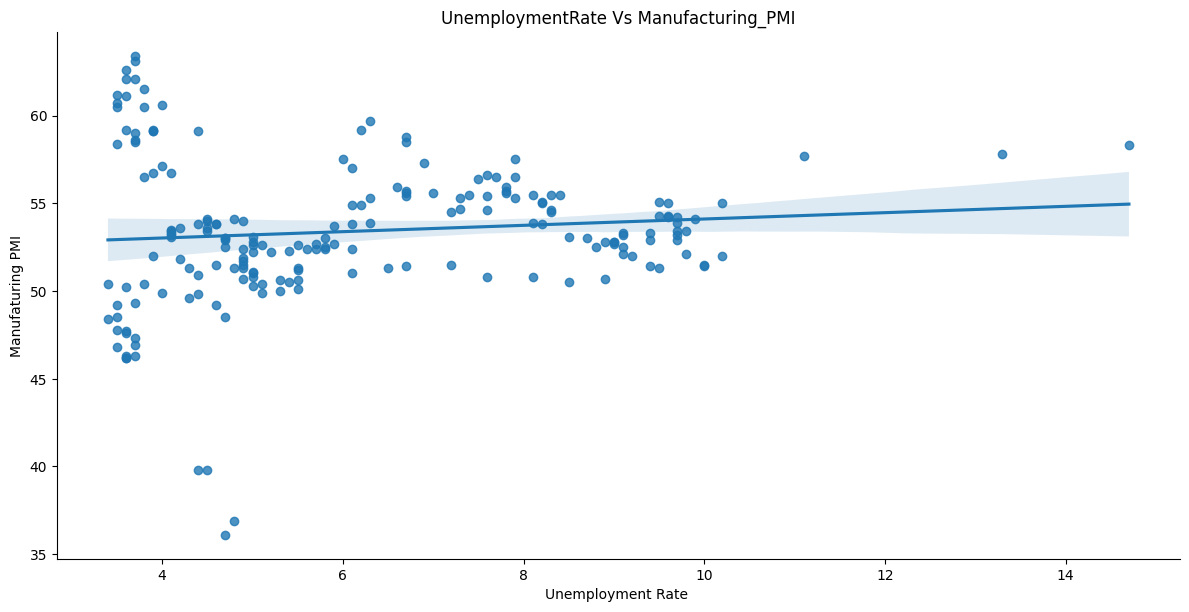

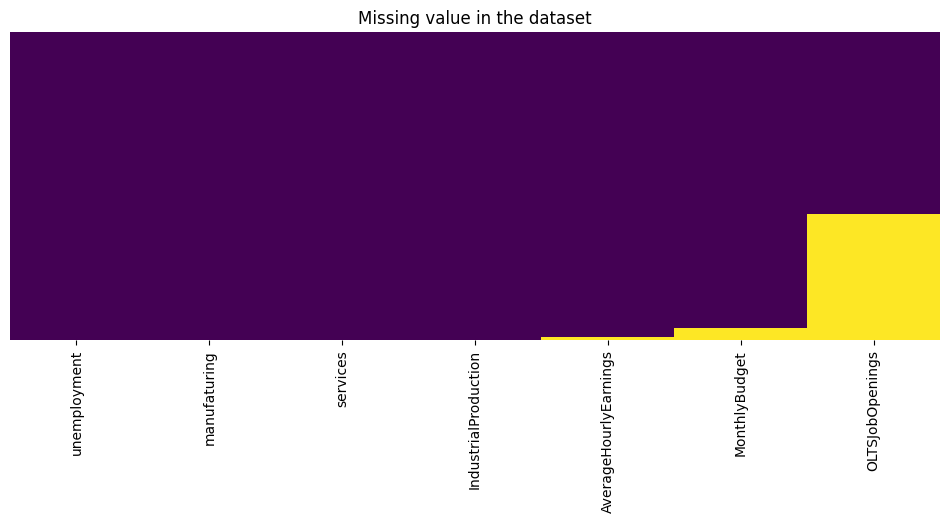

In [4]:
sns.lmplot(x='unemployment',y='manufaturing',data=final_df,aspect=2,height=6)
plt.xlabel('Unemployment Rate ')
plt.ylabel('Manufaturing PMI')
plt.title('UnemploymentRate Vs Manufacturing_PMI');


plt.figure(figsize=(12,4))
sns.heatmap(final_df.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Missing value in the dataset');

In [34]:
final_df['manufaturing'].value_counts()

51.3    6
52.4    5
53.8    5
52.8    4
52.5    4
       ..
57.8    1
51.1    1
57.7    1
50.3    1
50.0    1
Name: manufaturing, Length: 102, dtype: int64

In [36]:
pd.get_dummies(final_df.manufaturing, drop_first=True, dummy_na=True).head()

,36.9,39.8,46.2,46.3,46.8,46.9,47.3,47.6,47.7,47.8,...,60.6,60.7,61.1,61.2,61.5,62.1,62.6,63.1,63.4,NaN
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
# find outliers for unemployment variable

IQR = final_df.unemployment.quantile(0.75) - final_df.unemployment.quantile(0.25)
Lower_fence = final_df.unemployment.quantile(0.25) - (IQR * 3)
Upper_fence = final_df.unemployment.quantile(0.75) + (IQR * 3)
print('unemployment outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


# find outliers for unemployment variable

IQR = final_df.manufaturing.quantile(0.75) - final_df.manufaturing.quantile(0.25)
Lower_fence = final_df.manufaturing.quantile(0.25) - (IQR * 3)
Upper_fence = final_df.manufaturing.quantile(0.75) + (IQR * 3)
print('manufaturing outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

unemployment outliers are values < -6.900000000000001 or > 19.0
manufaturing outliers are values < 38.69999999999999 or > 68.10000000000001


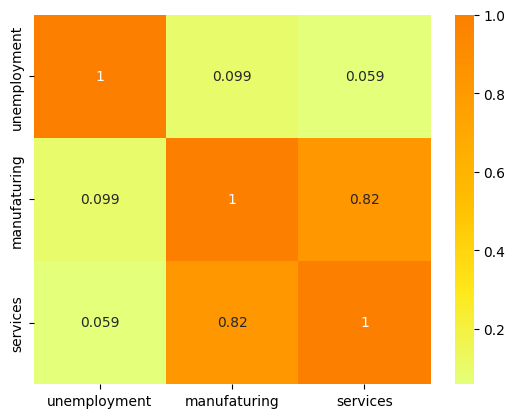

In [3]:
corr = final_df.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);

In [4]:
print(final_df.describe())

       unemployment  manufaturing    services
count    197.000000    197.000000  197.000000
mean       6.120305     53.403046   53.372081
std        2.250123      4.124564    5.168042
min        3.400000     36.100000   26.700000
25%        4.200000     51.300000   51.400000
50%        5.500000     53.200000   54.200000
75%        7.900000     55.500000   55.600000
max       14.700000     63.400000   70.400000


C:\Users\ACER\AppData\Local\Temp\ipykernel_20228\1444082686.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df['unemployment'],bins=50,color='r',ax=ax)
C:\Users\ACER\AppData\Local\Temp\ipykernel_20228\1444082686.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(final_df['un

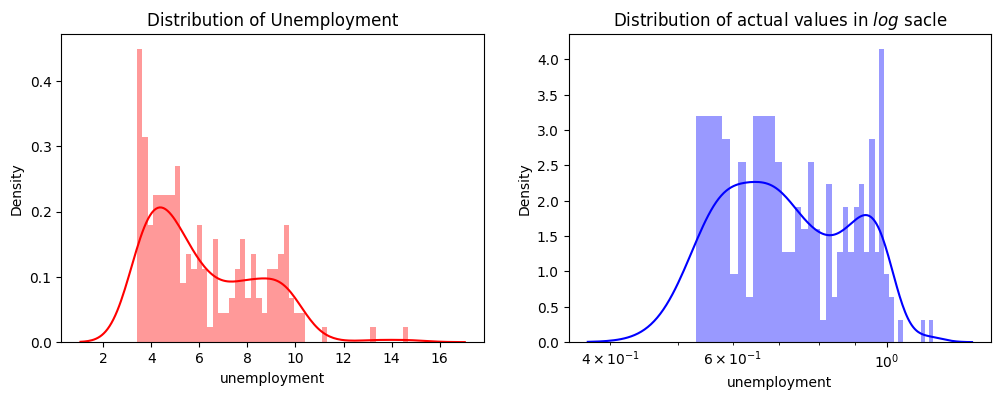

In [5]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(final_df['unemployment'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of Unemployment')

# ax=f.add_subplot(121)
# sns.distplot(final_df['manufaturing'],bins=50,color='r',ax=ax)
# ax.set_title('Distribution of actual values - ')

ax=f.add_subplot(122)
sns.distplot(np.log10(final_df['unemployment']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of actual values in $log$ sacle')
ax.set_xscale('log');

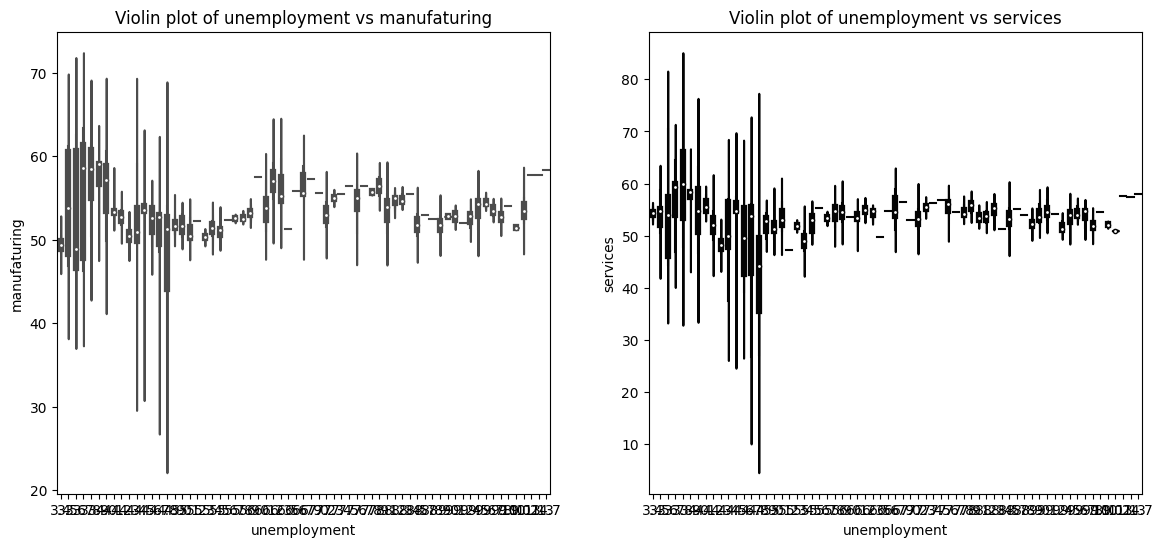

In [6]:


f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='unemployment', y='manufaturing',data=final_df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of unemployment vs manufaturing')

ax = f.add_subplot(122)
sns.violinplot(x='unemployment', y='services',data=final_df,palette='magma',ax=ax)
ax.set_title('Violin plot of unemployment vs services');

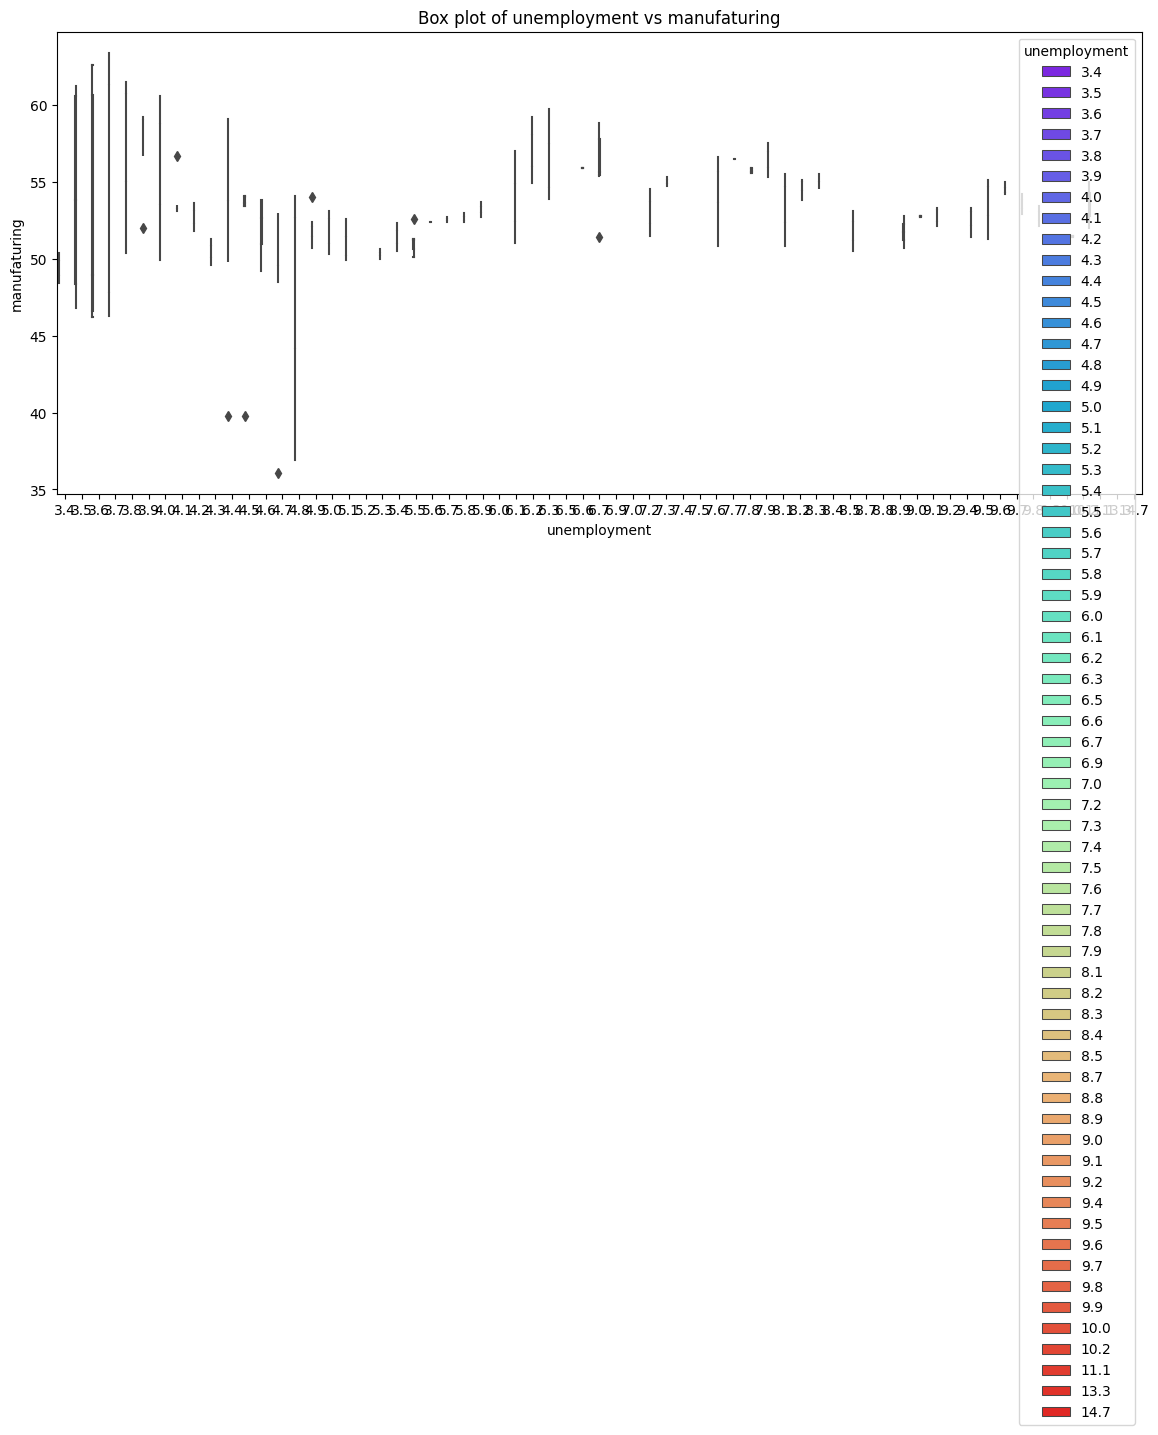

In [7]:
# plt.figure(figsize=(14,6))
# sns.boxplot(x='unemployment', y='manufaturing',hue='unemployment',data=final_df,palette='rainbow')
# plt.title('Box plot of unemployment vs manufaturing');


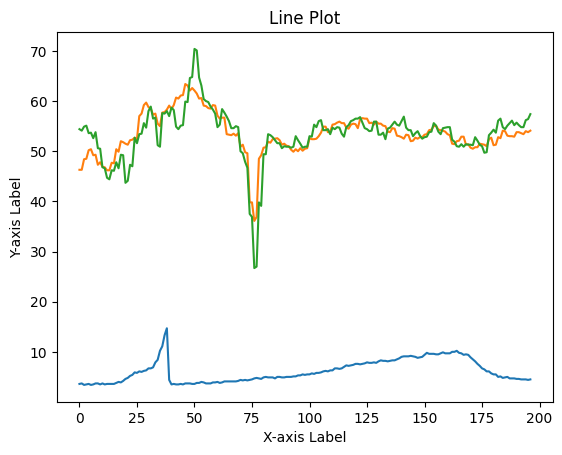

In [8]:

plt.plot(final_df.index, final_df['unemployment'], label='unemployment')
plt.plot(final_df.index, final_df['manufaturing'], label='manufaturing')
plt.plot(final_df.index, final_df['services'], label='services')
# plt.plot(df1.index, df1['consensus'], label='Consensus')

# plt.plot(filtered_df2.index, filtered_df2['actual'], label='Actual')
# plt.plot(df2.index, df2['consensus'], label='Consensus')


#plt.plot(df.index, df['diff'], label='Consensus')

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Line Plot')
plt.show()

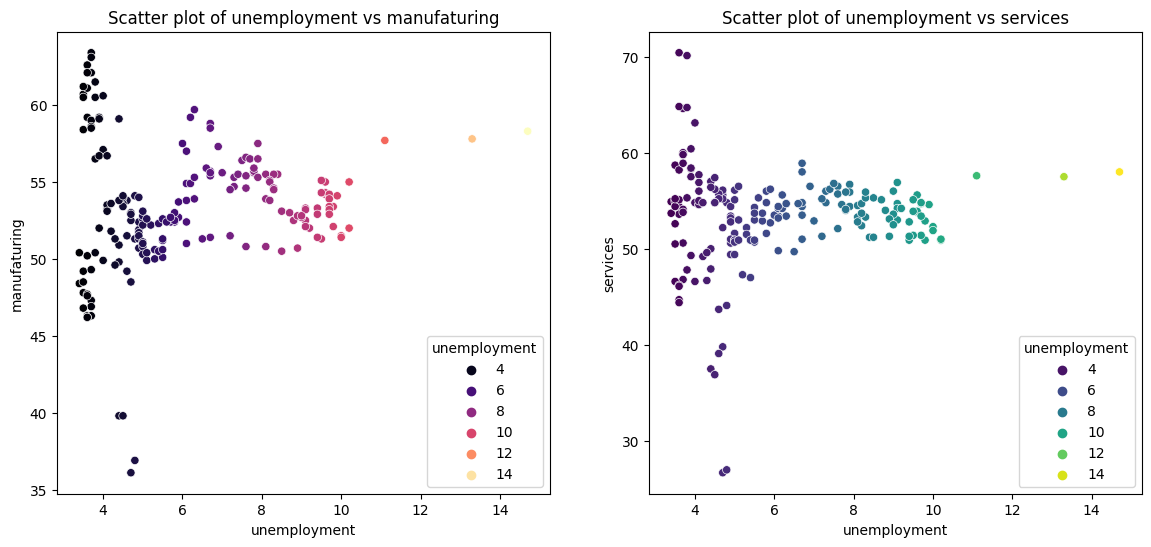

In [9]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='unemployment',y='manufaturing',data=final_df,palette='magma',hue='unemployment',ax=ax)
ax.set_title('Scatter plot of unemployment vs manufaturing')

ax = f.add_subplot(122)
sns.scatterplot(x='unemployment',y='services',data=final_df,palette='viridis',hue='unemployment')
ax.set_title('Scatter plot of unemployment vs services')
plt.savefig('sc.png');

In [10]:
from sklearn.model_selection import train_test_split
X = final_df.drop('unemployment',axis=1) # Independet variable
y = final_df['unemployment'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

In [11]:
# Step 1: add x0 =1 to dataset
X_train_0 = np.c_[np.ones((X_train.shape[0],1)),X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0],1)),X_test]

# Step2: build model
theta = np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0) ), np.matmul(X_train_0.T,y_train)) 

In [12]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [13]:
# Scikit Learn module
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train) # Note: x_0 =1 is no need to add, sklearn will take care of it.

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_df

,Parameter,Columns,theta,Sklearn_theta
0,theta_0,intersect:x_0=1,2.008176,2.008176
1,theta_1,manufaturing,0.135843,0.135843
2,theta_2,services,-0.058153,-0.058153


In [14]:
# Normal equation
y_pred_norm =  np.matmul(X_test_0,theta)

#Evaluvation: MSE
J_mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) or J(theta) is:  4.5577191855308135
R square obtain for normal equation method is : -0.032804234747620065


In [15]:
# sklearn regression module
y_pred_sk = lin_reg.predict(X_test)

#Evaluvation: MSE
from sklearn.metrics import mean_squared_error
J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R_square
R_square_sk = lin_reg.score(X_test,y_test)
print('The Mean Square Error(MSE) or J(theta) is: ',J_mse_sk)
print('R square obtain for scikit learn library is :',R_square_sk)

The Mean Square Error(MSE) or J(theta) is:  4.557719185530905
R square obtain for scikit learn library is : -0.03280423474764094


C:\Users\ACER\AppData\Local\Temp\ipykernel_20228\1143727541.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred_sk),ax=ax,color='b')


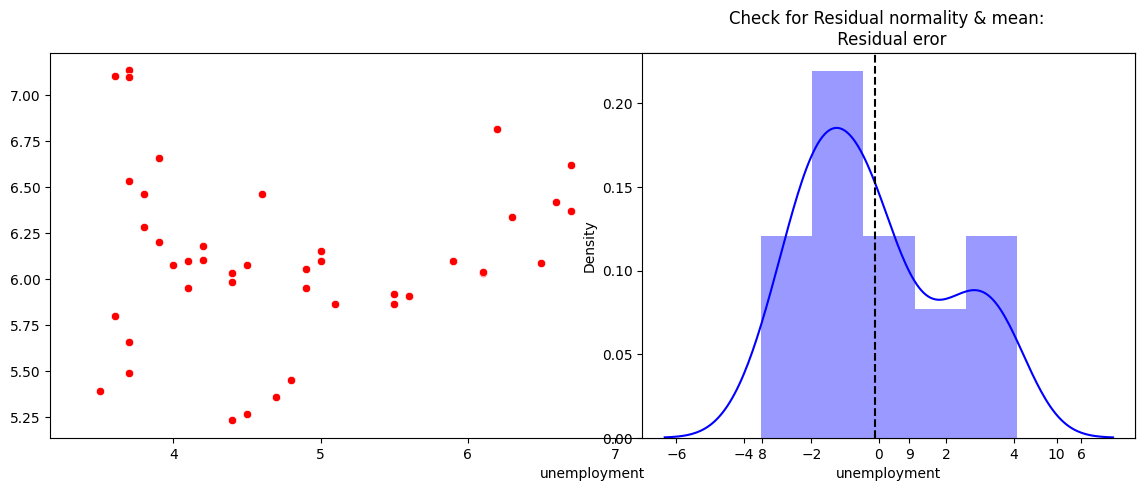

In [16]:
# Check for Linearity
f = plt.figure(figsize=(14,5))

# sns.scatterplot(y_test,y_pred_sk,ax=ax,color='r')
sns.scatterplot(x=y_test,y=y_pred_sk, color='r')
# sns.scatterplot(data = ax, color='b')


ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

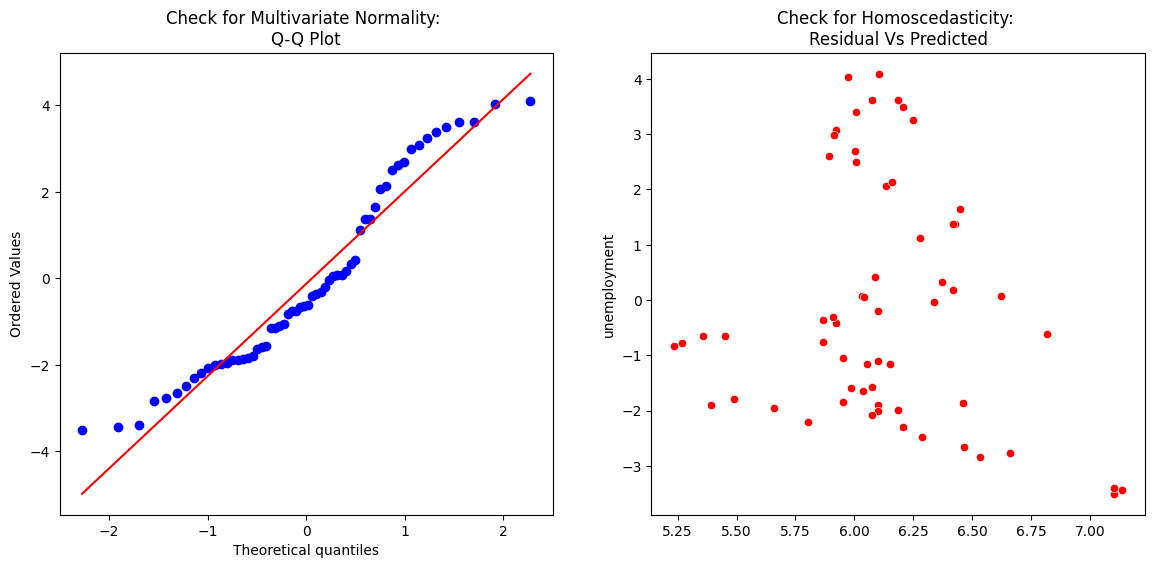

In [17]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [18]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- R_square_sk)
VIF

0.9682377030961182

In [19]:
from sklearn.metrics import r2_score, mean_squared_error

# Assuming you have a separate test dataset X_test and y_test

# Predict on the test data
y_pred = lin_reg.predict(X_test)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

print("R-squared:", r_squared)
print("Mean Squared Error (MSE):", mse)

R-squared: -0.03280423474764094
Mean Squared Error (MSE): 4.557719185530905


# Logistic Regression


In [23]:

X = final_df.drop('unemployment',axis=1) # Independet variable
y = final_df['unemployment'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)



# Predict on the test data
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

ValueError: Unknown label type: 'continuous'